# Моделирование ассимптотической нормальности и несмещенности

## Задание

Пусть $x_1, \ldots, x_n$ ~ Bin(m, p). Пусть $\hat{\theta}_n=e^{\overline{x}}$. \
Для какого параметра $\theta_0 = \theta_0(m, p)$ оценка $\hat{\theta}_n$ будет асимптотически нормальной оценкой? Продемонстрируйте асимптотическую нормальность с помощью моделирования. \
Исследуйте $\hat{\theta}_n$ на (асимптотическую) несмещенность.

## Решение

### Нормальность

Найти параметр, для которого $\hat{\theta}_n=e^{\overline{x}}$ будет асимптотически нормальной оценкой можно аналитически: \
Оценка $\hat{\theta}_n$ имеет вид $\hat{\theta}_n = H(\overline{g(X)}) $, где $H(t)=e^t$, а g(y) = y. $H(g)$ непрерывно дифференцируема в точке $E[g(x_1)]=mp$:
$$
H'(mp)=e^{mp} \not = 0
$$
Следовательно, оценка $\hat{\theta}_n$ является асимптотически нормальной оценкой параметра $e^{E[g(x_1)]}=e^{mp}$ с коэффициентом:
$$
\sigma^2(m, p) = (H'(E[g(x_1)]))^2 \cdot D[g(x_1)] = mp(1-p)e^{2mp}
$$

Покажем, что $\hat{\theta}_n=e^{\overline{x}}$ является асимптотически нормальной оценкой для $e^{2mp}$ с помощью моделирования.

In [27]:
# Импортируем необходимые библиотки
import numpy as np
import scipy
import matplotlib.pyplot as plt
import math

Функция стандартного нормального распределения:

In [28]:
def Gauss_distribution_function(x):
    return 1/2 + 1/2*scipy.special.erf(x/math.sqrt(2))

Зададим параметры моделирования:

In [165]:
m, p = 5, 0.7      # параметры для генерации выборки из биномиального распределения
n = 3000          # максимальное количество элементов выборки
iterations = 5000    # количество итераций для каждой выборки определенного размера (для определения распределения оценки)
epsilon = 0.1
interval = np.linspace(-3, 3, 10000)   # отрезок, который охватывает значения, состовляющие вероятность 0,9972
F = Gauss_distribution_function(interval)   # Функция стандартного нормального распределения для точек из interval
theta = math.exp(m*p)                       # Параметр, который мы оцениваем
sigma_mp = np.sqrt(m*p*(1-p)*math.exp(2*m*p))  # Коэффициент асимптотической нормальности

Мы просто покажем, что среднее значение разности между $F$ и $F_n$ стремится к нулю при увеличении $n$, \
где $F$ - стандартное номальное распределение, \
$F_n$ - распределение случайной величины $\sqrt{n} \frac{\hat{\theta}_n-\theta}{\sigma(m,p)}$. \
Это является признаком слабой сходимости интересующей нас величины к стандартному нормальному распределению.
Моделировать будем так же, как и в прошлой домашней работе, но с тем отличием, что будем смотреть слабую сходимость, а не по вероятности.

In [192]:
save_diff = diff
F_n_save = F_n

In [221]:
diff = np.array([])  # Массив разности функций распределения
for ni in range(1, n):
    theta_arr = []  #  Массив оценок для данного размера выборки
    for mi in range(ni):
        data = scipy.stats.binom.rvs(m, p, size=ni)     # сгенерированные данные
        X_mean = np.mean(data)                          # Выборочное среднее
        theta_n = np.exp(X_mean)                        # Значение оценки
        theta_arr.append(theta_n)
    F_n = scipy.stats.ecdf(math.sqrt(ni) * (np.array(theta_arr)-theta) / sigma_mp)  # Функция распределения для сравнения с ст. норм. распр.
    diff = np.append(diff, np.max(np.abs(F-F_n.cdf.evaluate(interval))))  # Считаем разницу между ф.р. как максимальное значение абс. отклонения

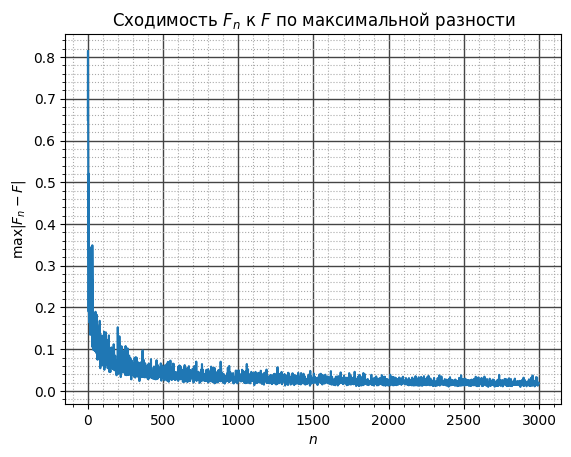

In [222]:
plt.plot(diff)
plt.xlabel('$n$')
plt.ylabel('$\\max |F_n-F|$')
plt.minorticks_on()
plt.grid(which='major', color = '#444', linewidth = 1)
plt.grid(which='minor', color='#aaa', ls=':')
plt.title('Сходимость $F_n$ к $F$ по максимальной разности')
plt.show()

Для лучшей визуализации изобразим на одном графике оба распределения: $F$ и $F_n$ при $n = 3000$.

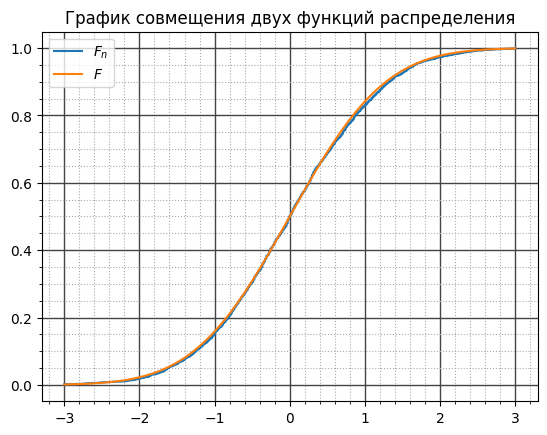

In [225]:
plt.plot(interval, F_n.cdf.evaluate(interval), label='$F_n$')
plt.plot(interval, F, label='$F$')
plt.minorticks_on()
plt.grid(which='major', color = '#444', linewidth = 1)
plt.grid(which='minor', color='#aaa', ls=':')
plt.legend()
plt.title('График совмещения двух функций распределения')
plt.show()

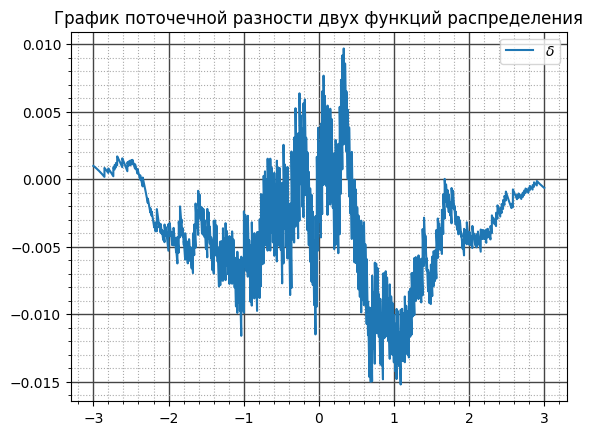

In [226]:
plt.plot(interval, F_n.cdf.evaluate(interval)-F, label='$\delta$')
plt.minorticks_on()
plt.grid(which='major', color = '#444', linewidth = 1)
plt.grid(which='minor', color='#aaa', ls=':')
plt.legend()
plt.title('График поточечной разности двух функций распределения')
plt.show()

На графиках видно, что функция распределения $\sqrt{n} \frac{\hat{\theta}_n-\theta}{\sigma(m,p)}$ действительно близко находится к стандартному нормальному распределению.

###  Несмещенность

Далее исследуем $\hat{\theta}_n$ на асимптотическую несмещенность:

In [174]:
# Моделирование аналогично первому пункту
E = np.array([])   # массив для мат. ожиданий
for ni in range(1, n):
    theta_arr_E = []
    for mi in range(ni):
        data_E = scipy.stats.binom.rvs(m, p, size=ni)
        X_mean_E = np.mean(data_E)
        theta_n_E = np.exp(X_mean_E)
        theta_arr_E.append(theta_n_E)
    E = np.append(E, np.mean(theta_arr_E))

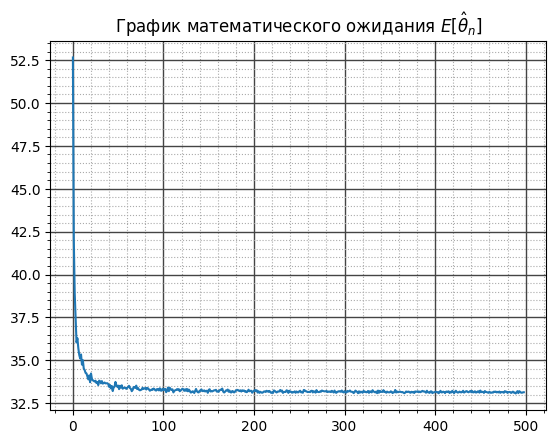

In [182]:
plt.plot(E)
plt.minorticks_on()
plt.grid(which='major', color = '#444', linewidth = 1)
plt.grid(which='minor', color='#aaa', ls=':')
plt.title('График математического ожидания $E[\hat{\\theta}_n]$')
plt.show()

На графике видно, что оценка асимптотически несмещенная, так как значение её математического ожидания стремится к $\theta = e^{mp} = 33.11$. Для наглядности можно построить такой график:

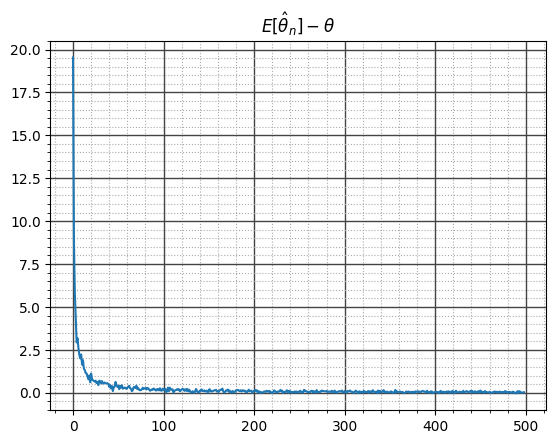

In [181]:
plt.plot(E-theta)
plt.minorticks_on()
plt.grid(which='major', color = '#444', linewidth = 1)
plt.grid(which='minor', color='#aaa', ls=':')
plt.title('$E[\hat{\\theta}_n] - \\theta$')
plt.show()